<a href="https://colab.research.google.com/github/akizeng/APM-Project/blob/master/ResNet_w_o_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q kaggle

!mkdir -p ~/.kaggle
!echo '{}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c humpback-whale-identification

  0% 0.00/498k [00:00<?, ?B/s]
100% 498k/498k [00:00<00:00, 75.4MB/s]
  0% 0.00/594k [00:00<?, ?B/s]
100% 594k/594k [00:00<00:00, 83.3MB/s]
100% 1.34G/1.35G [00:16<00:00, 117MB/s]
100% 1.35G/1.35G [00:16<00:00, 88.6MB/s]
100% 4.15G/4.16G [01:12<00:00, 47.2MB/s]
100% 4.16G/4.16G [01:12<00:00, 61.6MB/s]


In [0]:
!unzip \*.zip

In [0]:
%matplotlib inline
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
from zipfile import ZipFile
# Create a ZipFile Object and load sample.zip in it
with ZipFile('train.zip', 'r') as zipObj:
  # Extract all the contents of zip file in different directory
  zipObj.extractall('train')

In [0]:
df = pd.read_csv('train.csv')

In [0]:
df.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


Text(0, 0.5, 'Numbers')

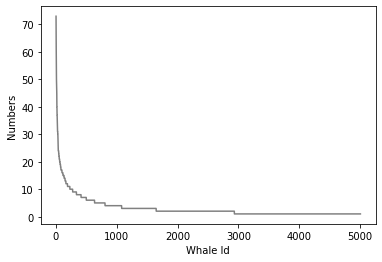

In [0]:
df2 = df.groupby('Id').count().sort_values(by='Image',ascending=False).reset_index()
plt.plot(df2['Image'][1:],c='grey')
plt.xlabel('Whale Id')
plt.ylabel('Numbers')

In [0]:
len(df2[df2['Image']<10])/len(df2)

0.9452547452547453

In [0]:
df2['Image'][0]/df2['Image'].sum()

0.3810575292772367

In [0]:
TRAIN ="train"
TEST = "test"
LABELS = "train.csv"
SUB = "sample_submission.csv"

IMG_SIZE = 200


def text2number(LABELS):
    df = pd.read_csv(LABELS)
    
    uni_labels = pd.DataFrame(df['Id'].unique(),columns=['Id'])
    uni_labels.index.name = 'ID_new'
    uni_labels = uni_labels.reset_index()


    df = df.merge(uni_labels,on='Id')
    
    return df
    
#submit = [p for _, p, _ in pd.read_csv(SUB).to_records()]
#join = list(tagged.keys()) + submit
df = text2number(LABELS)

tagged = dict([(p, w) for _, p,_, w in df.to_records()])

9c2ad64a9.jpg


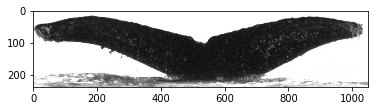

In [0]:
path = os.path.abspath(TRAIN)
for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    print(img)
    plt.imshow(img_array,cmap='gray')
    plt.show()
    break

In [0]:
print(img_array.shape)

(239, 1050)


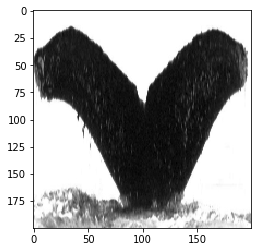

In [0]:
IMG_SIZE = 200

new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [0]:
pd.read_csv(LABELS).to_records()

rec.array([(    0, '0000e88ab.jpg', 'w_f48451c'),
           (    1, '0001f9222.jpg', 'w_c3d896a'),
           (    2, '00029d126.jpg', 'w_20df2c5'), ...,
           (25358, 'fff9002e0.jpg', 'w_bd1c3d5'),
           (25359, 'fffcde6fe.jpg', 'w_9f30885'),
           (25360, 'fffde072b.jpg', 'new_whale')],
          dtype=[('index', '<i8'), ('Image', 'O'), ('Id', 'O')])

In [0]:
df.head()

,Image,Id,ID_new
0,0000e88ab.jpg,w_f48451c,0
1,0af805558.jpg,w_f48451c,0
2,1c351b88e.jpg,w_f48451c,0
3,6f7abb1be.jpg,w_f48451c,0
4,77a44bf94.jpg,w_f48451c,0


In [0]:
df.to_csv('index_tag.csv')

In [0]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from keras import layers
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model

import keras.backend as K
from keras.models import Sequential

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

In [0]:
def create_training_data():
    count = 1
    training_data = []
    class_num = []
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
            class_num = tagged[img]
            training_data.append([new_array,class_num])
            count += 1
        except Exception as e:
            pass           
        
    return training_data
    
train_data = create_training_data()

In [0]:
train_data[:5]

[[array([[254, 254, 254, ..., 254, 254, 254],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [248, 246, 246, ..., 254, 252, 253],
         [248, 246, 244, ..., 253, 253, 254],
         [245, 245, 243, ..., 252, 252, 250]], dtype=uint8), 572],
 [array([[139, 139, 138, ..., 171, 168, 167],
         [138, 143, 145, ..., 178, 175, 176],
         [139, 139, 151, ..., 176, 174, 177],
         ...,
         [229, 195, 167, ..., 136, 146, 150],
         [225, 208, 172, ..., 111, 124, 155],
         [225, 217, 202, ...,  96,  97, 152]], dtype=uint8), 763],
 [array([[126, 128, 162, ..., 109, 123, 133],
         [138, 124, 135, ...,  83, 108, 139],
         [141, 122, 121, ...,  61,  79, 113],
         ...,
         [ 39,  48,  64, ...,  44,  44,  42],
         [ 41,  45,  55, ...,  55,  54,  61],
         [ 47,  48,  55, ...,  67,  72,  71]], dtype=uint8), 3],
 [array([[ 94,  98,  97, ...,  79,  88,  95],
         [ 86,  90,  99

In [0]:
def prepareImages(data, m, dataset):
    print("Preparing images")
    X_train = np.zeros((m, 100, 100, 3))
    count = 0
    
    for fig in data['Image']:
        #load images into images of size 100x100x3
        img = image.load_img(dataset+"/"+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)

        X_train[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    
    return X_train 

In [0]:
def prepare_labels(y):
    values = np.array(y)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    # print(integer_encoded)

    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    # print(onehot_encoded)

    y = onehot_encoded
    # print(y.shape)
    return y, label_encoder

In [0]:

X = prepareImages(df, df.shape[0], "train")
X /= 255

Preparing images
Processing image:  1 ,  0000e88ab.jpg
Processing image:  501 ,  0baa89964.jpg
Processing image:  1001 ,  1984f2d9f.jpg
Processing image:  1501 ,  26e271ca5.jpg
Processing image:  2001 ,  34481f22e.jpg
Processing image:  2501 ,  4110e4a11.jpg
Processing image:  3001 ,  4dd7de9b0.jpg
Processing image:  3501 ,  5a98812a7.jpg
Processing image:  4001 ,  68a4ff4e2.jpg
Processing image:  4501 ,  75f1368d1.jpg
Processing image:  5001 ,  828a0641d.jpg
Processing image:  5501 ,  8fdecbd92.jpg
Processing image:  6001 ,  9c9fd59ef.jpg
Processing image:  6501 ,  a93955ecc.jpg
Processing image:  7001 ,  b665f5243.jpg
Processing image:  7501 ,  c4ecb125f.jpg
Processing image:  8001 ,  d2b5789f2.jpg
Processing image:  8501 ,  df15cc35a.jpg
Processing image:  9001 ,  ed38599c2.jpg
Processing image:  9501 ,  fa9699838.jpg
Processing image:  10001 ,  5eb83a49f.jpg
Processing image:  10501 ,  e9ac41eae.jpg
Processing image:  11001 ,  60fd46031.jpg
Processing image:  11501 ,  b17668b8c.jpg

In [0]:
y, label_encoder = prepare_labels(df['Id'])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
model = Sequential()

model.add(Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0', input_shape = (100, 100, 3)))

model.add(BatchNormalization(axis = 3, name = 'bn0'))
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2), name='max_pool'))
model.add(Conv2D(64, (3, 3), strides = (1,1), name="conv1"))
model.add(Activation('relu'))
model.add(AveragePooling2D((3, 3), name='avg_pool'))

model.add(Flatten())
model.add(Dense(500, activation="relu", name='rl'))
model.add(Dropout(0.8))
model.add(Dense(y.shape[1], activation='softmax', name='sm'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 94, 94, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 94, 94, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 94, 94, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 47, 47, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 45, 45, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 45, 45, 64)        0

In [0]:
history = model.fit(X, y, epochs=100, batch_size=100, verbose=1)
#gc.collect()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
25361/25361 [==============================] - 15s 593us/step - loss: 6.1884 - acc: 0.3794
Epoch 2/100
25361/25361 [==============================] - 10s 398us/step - loss: 5.8912 - acc: 0.3811
Epoch 3/100
25361/25361 [==============================] - 10s 396us/step - loss: 5.7781 - acc: 0.3811
Epoch 4/100
25361/25361 [==============================] - 10s 397us/step - loss: 5.7182 - acc: 0.3811
Epoch 5/100
25361/25361 [==============================] - 10s 403us/step - loss: 5.6974 - acc: 0.3811
Epoch 6/100
25361/25361 [==============================] - 10s 399us/step - loss: 5.6642 - acc: 0.3811
Epoch 7/100
25361/25361 [==============================] - 10s 396us/step - loss: 5.6324 - acc: 0.3811
Epoch 8/100
25361/25361 [==============================] - 10s 397us/step - loss: 5.5977 - acc: 0.3811
Epoch 9/100
25361/25361 [==============================] - 10s 396us/step - loss

NameError: ignored

In [0]:
# Find fluke pics of whales that have less than 10 pics in training data

TRAIN ="train"
LABELS = "train.csv"

train = pd.read_csv(LABELS)
train_count = train.groupby('Id').count().rename(columns={"Image":"image_count"})
train = train.merge(train_count,on=['Id'])
filelist = train['Image'].loc[(train['image_count']<10)].tolist()
filelist[:5]

['0001f9222.jpg',
 '1d6ccd05a.jpg',
 '2cccac55a.jpg',
 'cad8eabe4.jpg',
 '00029d126.jpg']

In [0]:
# Generate 10 new pics from original pics

from PIL import ImageFilter
from PIL import Image
from time import time

try:
  os.makedirs('data/copy') # directory for new pics
except:
  pass

t=time()
tagged_new = tagged # to store image name and numeric class of orginal images + augmented images
# df = pd.read_csv(LABELS)
for count in range(0,2):
  for imagefile in filelist:
    fn = os.path.join('train', imagefile)
    class_num = tagged[imagefile]
    im=Image.open(fn)
    im=im.convert("RGB")
    r,g,b=im.split()
    r=r.convert("RGB")
    g=g.convert("RGB")
    b=b.convert("RGB")
    im_blur=im.filter(ImageFilter.GaussianBlur)
    im_unsharp=im.filter(ImageFilter.UnsharpMask)

    # Save augmented copy of each of the images each as R/B& G
    r.save(os.path.join('data/copy',str(count)+'r_'+imagefile))
    g.save(os.path.join('data/copy',str(count)+'g_'+imagefile))
    b.save(os.path.join('data/copy',str(count)+'b_'+imagefile))  
    # Save augmented copy of each image which is blury
    im_blur.save(os.path.join('data/copy',str(count)+'bl_'+imagefile))
    # Save augmented copy of each image which is unsharp
    im_unsharp.save(os.path.join('data/copy',str(count)+'un_'+imagefile))
   
    tagged_new[os.path.join(str(count)+'r_'+imagefile)] = class_num
    tagged_new[os.path.join(str(count)+'g_'+imagefile)] = class_num
    tagged_new[os.path.join(str(count)+'b_'+imagefile)] = class_num
    tagged_new[os.path.join(str(count)+'bl_'+imagefile)] = class_num
    tagged_new[os.path.join(str(count)+'un_'+imagefile)] = class_num

    # df2 = pd.DataFrame({'Image': [os.path.join(str(count)+'r_'+imagefile),
    #                     os.path.join(str(count)+'g_'+imagefile),
    #                     os.path.join(str(count)+'b_'+imagefile),
    #                     os.path.join(str(count)+'bl_'+imagefile),
    #                     os.path.join(str(count)+'un_'+imagefile)],
    #                      'Id':[class_num]*5})
    
    # df = pd.concat([df,df2])

#df.to_csv('new_train.csv')
print(time() -t ) # print running time: 3088.58s


In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc, ndimage
import keras
from keras import backend as k
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
from time import time

PATH = 'train'
BATCH = 32
IMG_SIZE = 224

train_datagen = ImageDataGenerator(validation_split=0.2,
                                   rescale = 1./255)

train_generator = train_datagen.flow_from_dataframe(df, # change this to df_new when using augmented data
                                                    directory=PATH,
                                                    x_col='Image',
                                                    y_col='Id',
                                                    class_mode='categorical',
                                                 #   color_mode='grayscale',
                                                    target_size=(IMG_SIZE,IMG_SIZE),
                                                    batch_size=BATCH,
                                                    subset="training",
                                                    shuffle=True
                                                   )

valid_generator = train_datagen.flow_from_dataframe(df,
                                                    directory=PATH,
                                                    x_col='Image',
                                                    y_col='Id',
                                                    class_mode='categorical',
                                                 #   color_mode='grayscale',
                                                    target_size=(IMG_SIZE,IMG_SIZE),
                                                    batch_size=BATCH,
                                                    subset="validation",
                                                    shuffle=True
                                                   )


STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
print("Total number of batches =", STEP_SIZE_TRAIN, "and", STEP_SIZE_VALID)


Found 20289 validated image filenames belonging to 5005 classes.
Found 5072 validated image filenames belonging to 5005 classes.
Total number of batches = 634 and 158


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from time import time

model2 = Sequential()
model2.add(Conv2D(32,(7,7), strides = (1, 1), input_shape=(224,224,3)))
#model.add(BatchNormalization(axis = 3, name = 'bn0'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2), name='max_pool'))

model2.add(Conv2D(64,(3,3), strides = (1,1), name="conv1"))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(3,3), name='avg_pool'))

model2.add(Flatten())
model2.add(Dense(512, activation="relu", name='rl'))
model2.add(Dropout(0.15)) 

model2.add(Dense(5005,activation='softmax', name='sm'))

#model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

t = time()
history2 = model2.fit_generator(
        train_generator,
        steps_per_epoch=640,
        shuffle = True,
        epochs=10,
        validation_data=valid_generator,
        validation_steps=160,
        use_multiprocessing=True,
        workers=16
        )
print(time()-t)
#model2.fit(X,y,epochs=3, batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





640/640 [==============================] - 144s 225ms/step - loss: 7.1688 - acc: 0.2283 - val_loss: 1.7755 - val_acc: 0.9957
Epoch 2/10
640/640 [==============================] - 131s 205ms/step - loss: 6.8601 - acc: 0.2283 - val_loss: 1.3081 - val_acc: 0.9957
Epoch 3/10
640/640 [==============================] - 132s 206ms/step - loss: 6.7863 - acc: 0.2274 - val_loss: 1.5476 - val_acc: 0.9953
Epoch 4/10
640/640 [==============================] - 132s 206ms/step - loss: 6.7484 - acc: 0.2269 - val_loss: 1.5805 - val_acc: 0.9957
Epoch 5/10
640/640 [==============================] - 132s 206ms/step - loss: 6.6262 - acc: 0.2277 - val_loss: 1.6330 - val_acc: 0.9943
Epoch 6/10
640/640 [==============================] - 130s 204ms/step - loss: 6.3478 - acc: 0.2288 - val_loss: 1.6545 - val_acc: 0.9761
Epoch 7/10
640/640 [==============================] - 130s 203ms/step - loss: 5.84

In [0]:
a = model2.fit_generator(
        train_generator,
        steps_per_epoch=640,
        shuffle = True,
        epochs=1,
        validation_data=valid_generator,
        validation_steps=160,
        use_multiprocessing=True,
        workers=16
        )

Epoch 1/1
640/640 [==============================] - 127s 199ms/step - loss: 6.6313 - acc: 0.2273 - val_loss: 1.8889 - val_acc: 0.9951


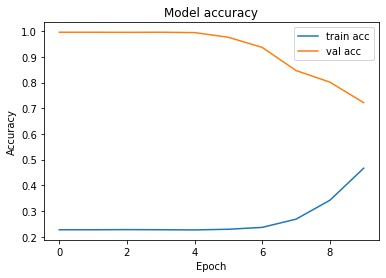

In [0]:
plt.plot(history2.history['acc'], label = 'train acc')
plt.plot(history2.history['val_acc'], label = 'val acc')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

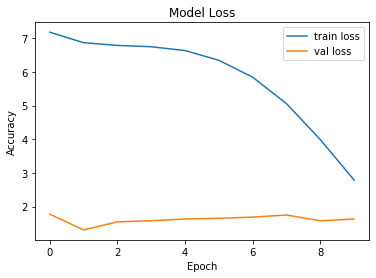

In [0]:
plt.plot(history2.history['loss'], label = 'train loss')
plt.plot(history2.history['val_loss'], label = 'val loss')
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

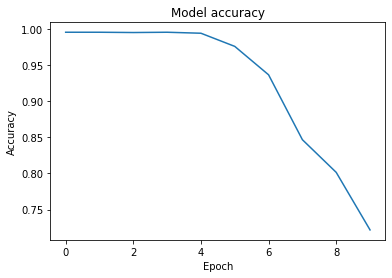

In [0]:
plt.plot(np.arange(0, 10), history2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

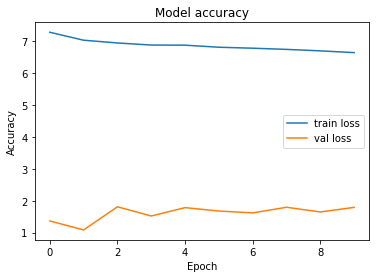

In [0]:
plt.plot(history2.history['loss'], label = 'train loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
import random

import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import *
from keras.optimizers import *
from keras.applications import *
from keras.callbacks import *
from keras.initializers import *
from keras.preprocessing.image import ImageDataGenerator

from numpy.random import seed
seed(1)

# Load pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

for layer in base_model.layers:
    layer.trainable = True


# get class size
n_classes = 5005

# Add layers at the end
X = base_model.output
X = Flatten()(X)

X = Dense(512, kernel_initializer='he_uniform')(X)
#X = Dropout(0.7)(X)
X = Activation('relu')(X)
X = BatchNormalization()(X)

# X = Dense(16, kernel_initializer='he_uniform')(X)
# #X = Dropout(0.7)(X)
# X = Activation('relu')(X)
# X = BatchNormalization()(X)

output = Dense(n_classes, activation='softmax')(X)

model3 = Model(inputs=base_model.input, outputs=output)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 7s 0us/step


In [0]:
optimizer = Adam(lr=0.0001)
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

n_epoch = 50

early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1, 
                           mode='auto', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, 
                              verbose=1, mode='auto')

In [0]:
from keras.callbacks import CSVLogger
from time import time

csv_logger = CSVLogger("Resnet_history_artists_200_log.csv", append=True)


t = time()
history3 = model3.fit_generator(
        train_generator,
        steps_per_epoch=1500,
        shuffle=True,
        verbose=1,
        callbacks=[reduce_lr, csv_logger],
        use_multiprocessing=True,
        epochs=10,
        validation_data=valid_generator,
        validation_steps=380)
print(time()-t)

Epoch 1/10
1500/1500 [==============================] - 589s 392ms/step - loss: 4.8801 - acc: 0.4253 - val_loss: 3.0436 - val_acc: 0.8243
Epoch 2/10
1500/1500 [==============================] - 577s 385ms/step - loss: 1.0274 - acc: 0.9266 - val_loss: 1.4815 - val_acc: 0.8964
Epoch 3/10
1500/1500 [==============================] - 584s 389ms/step - loss: 0.0610 - acc: 0.9977 - val_loss: 1.6081 - val_acc: 0.8767
Epoch 4/10
1500/1500 [==============================] - 595s 396ms/step - loss: 0.2408 - acc: 0.9793 - val_loss: 1.8952 - val_acc: 0.8405
Epoch 5/10
1500/1500 [==============================] - 597s 398ms/step - loss: 0.0887 - acc: 0.9929 - val_loss: 1.8191 - val_acc: 0.8301
Epoch 6/10
1500/1500 [==============================] - 600s 400ms/step - loss: 0.0183 - acc: 0.9986 - val_loss: 1.5879 - val_acc: 0.8461
Epoch 7/10
1500/1500 [==============================] - 603s 402ms/step - loss: 0.0068 - acc: 0.9993 - val_loss: 1.5886 - val_acc: 0.8480

Epoch 00007: ReduceLROnPlateau re

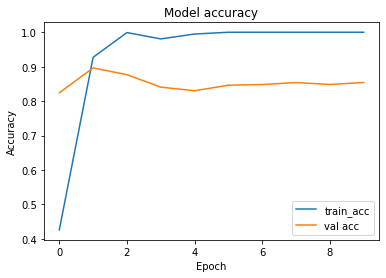

In [0]:
plt.plot(history3.history['acc'], label = 'train_acc')
plt.plot(history3.history['val_acc'], label='val acc')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()